In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

os.chdir('/home/sarvagya/DeepLenseSubmissionProposal-2025')
BASE_DIR = 'data/dataset'
labels = ['no', 'sphere', 'vort']

## **Visualizing Dataset**

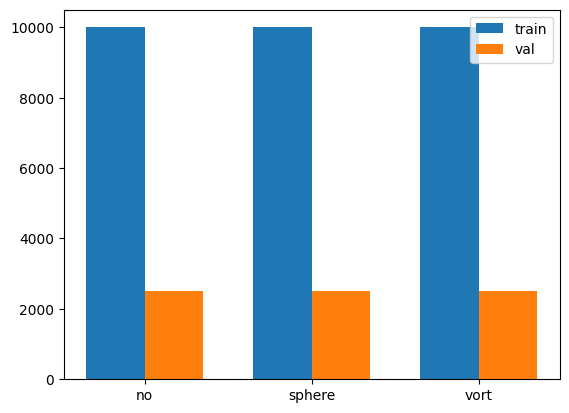

In [5]:
# plot count of each label in train , val
# count total files (using glob) under each label and draw a bar plot

tr_files_ct = {
    'no' : len(glob.glob(f'{BASE_DIR}/train/no/*')),
    'sphere' : len(glob.glob(f'{BASE_DIR}/train/sphere/*')),
    'vort' : len(glob.glob(f'{BASE_DIR}/train/vort/*'))
}

val_files_ct = {
    'no' : len(glob.glob(f'{BASE_DIR}/val/no/*')),
    'sphere' : len(glob.glob(f'{BASE_DIR}/val/sphere/*')),
    'vort' : len(glob.glob(f'{BASE_DIR}/val/vort/*'))
}

# plot train, val in same plot
fig, ax = plt.subplots()
bar_width = 0.35
x = np.arange(len(labels))
ax.bar(x - bar_width/2, list(tr_files_ct.values()), bar_width, label='train')
ax.bar(x + bar_width/2, list(val_files_ct.values()), bar_width, label='val')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

##### Plot the pictures randomly from each label

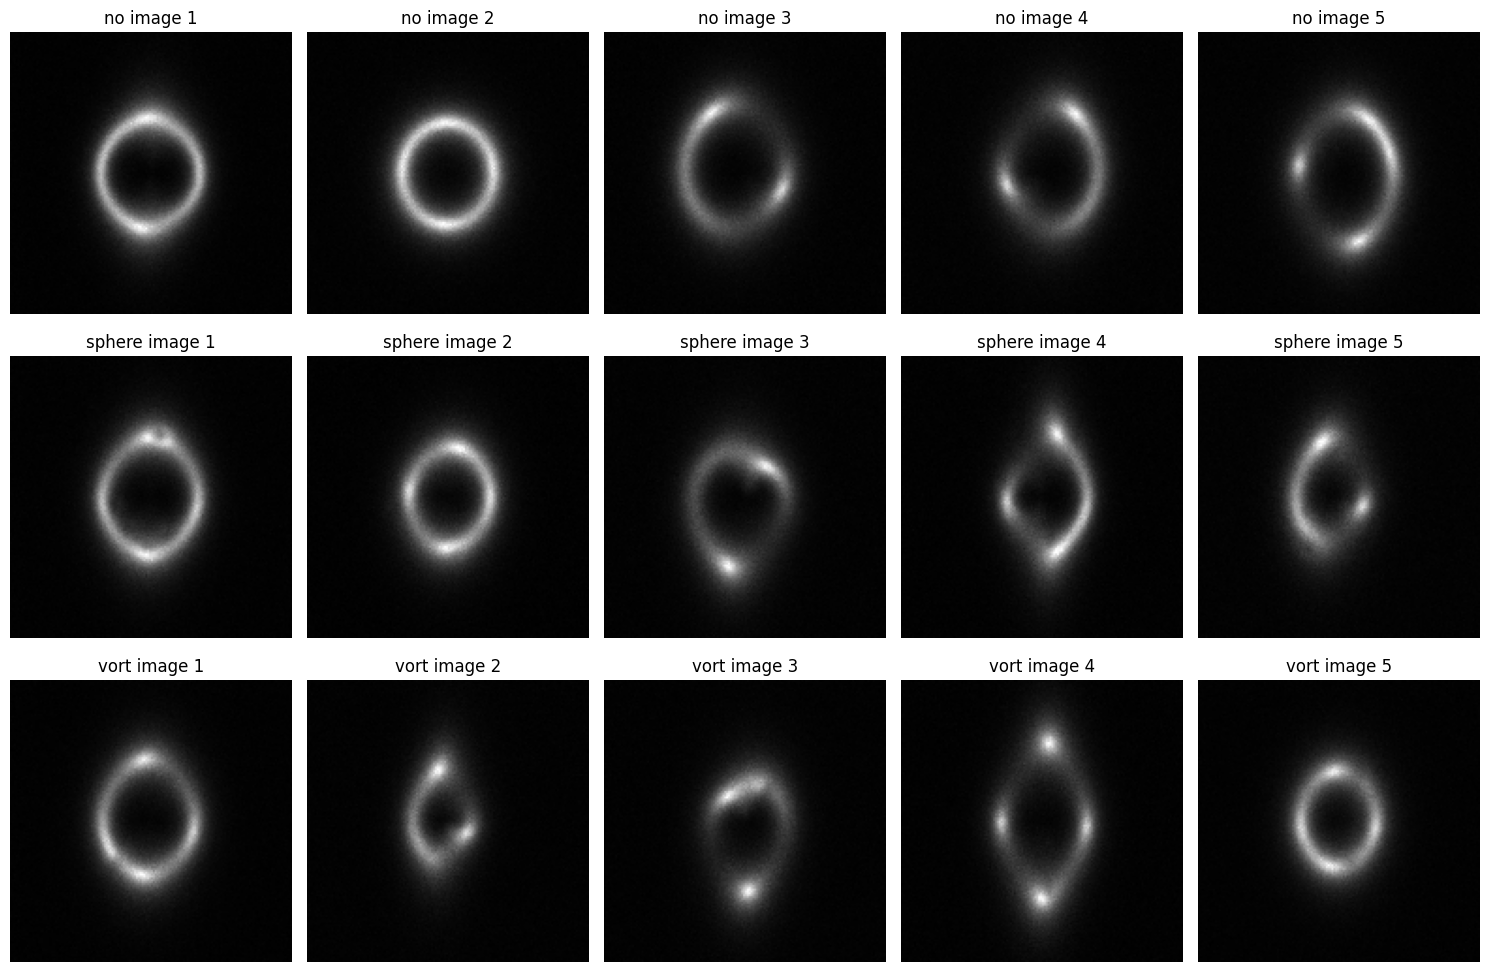

In [14]:
N_images_per_label = 5

# sample random image paths from each label in train
# create subplot for each label, each label in separate row
# plot each image in subplot
fig, axs = plt.subplots(len(labels), N_images_per_label, figsize=(15, 10))
for i, label in enumerate(labels):
    image_paths = glob.glob(f'{BASE_DIR}/train/{label}/*')
    for j in range(N_images_per_label):
        image_path = np.random.choice(image_paths)
        image = np.load(image_path).T
        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f'{label} image {j+1}')
plt.tight_layout()
plt.show()

### **Impact of thresholding pixel values**

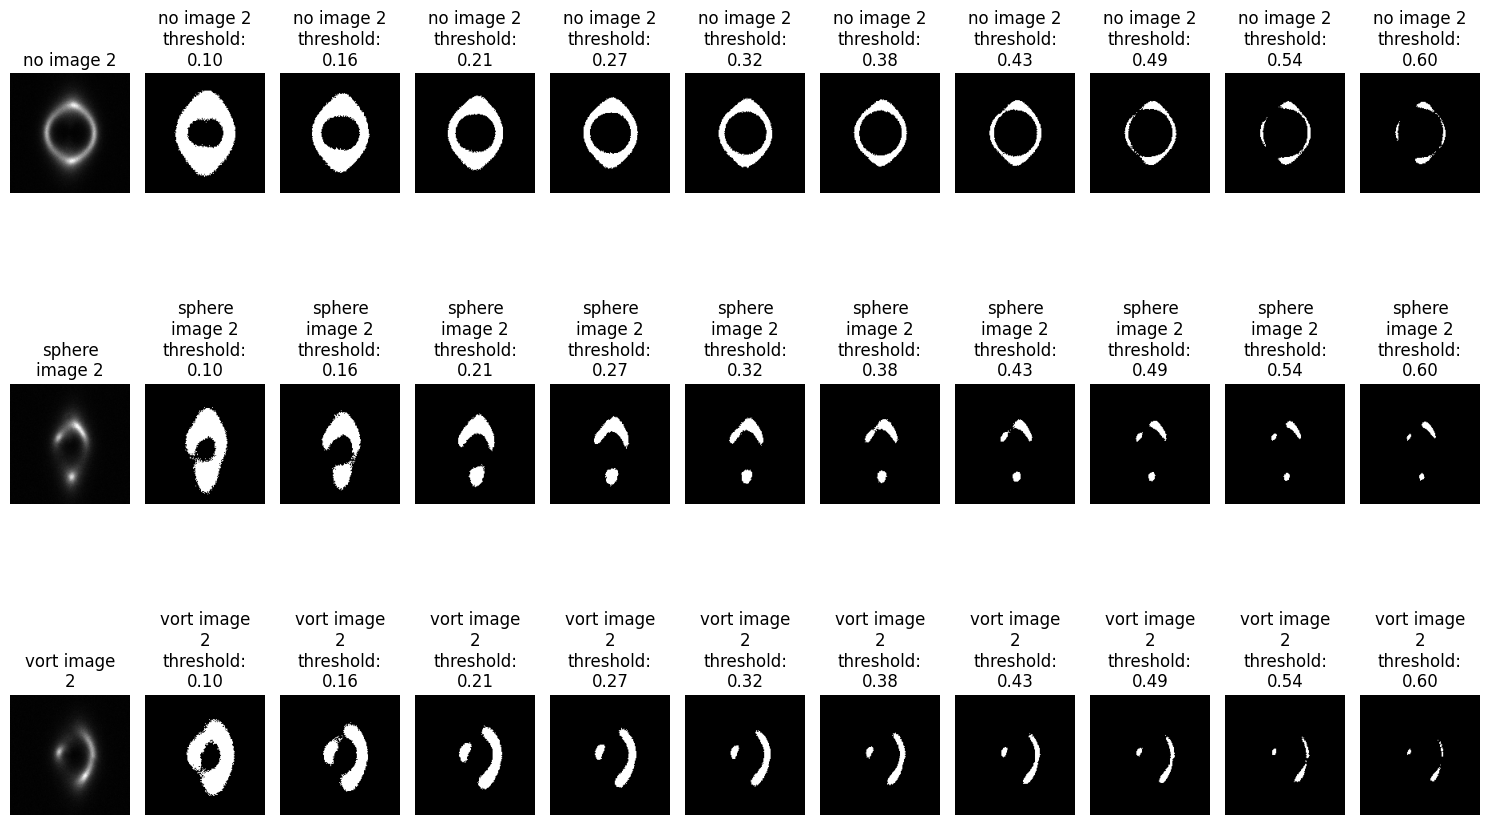

In [ ]:
# looking to see impact of thresholding applied to image pixels...

import textwrap

fig, axs = plt.subplots(len(labels), 11, figsize=(15, 10))
for i, label in enumerate(labels):
    image_paths = glob.glob(f'{BASE_DIR}/train/{label}/*')
    for j in range(2):
        image_path = np.random.choice(image_paths)
        image = np.load(image_path).T
        axs[i, 0].imshow(image, cmap='gray')
        axs[i, 0].axis('off')
        axs[i, 0].set_title("\n".join(textwrap.wrap(f'{label} image {j+1}', width=10)))
        
        thresholds = np.linspace(0.1, 0.6, 10)
        for k, thresh in enumerate(thresholds):
            thresholded_image = image > thresh
            axs[i, k+1].imshow(thresholded_image, cmap='gray')
            axs[i, k+1].axis('off')
            wrapped_title = "\n".join(textwrap.wrap(f'{label} image {j+1} threshold: {thresh:.2f}', width=10))
            axs[i, k+1].set_title(wrapped_title)

plt.tight_layout()
plt.show()


### Checking for Class Imbalace

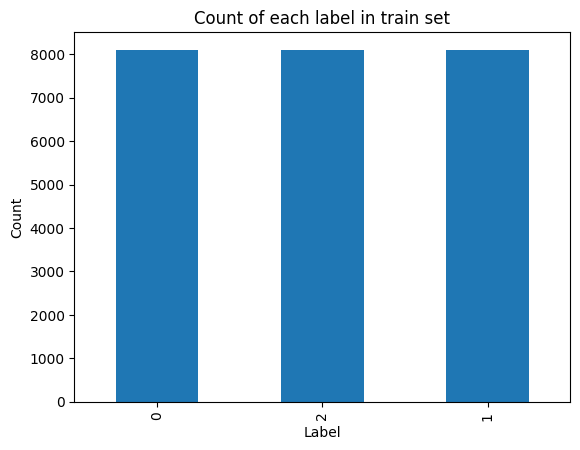

In [4]:
import pandas as pd

train_csv = pd.read_csv("data/dataframes/common_classification_dataset/train_df.csv")
labels = train_csv.loc[:, 'label']

# plot the bar graph
fig, ax = plt.subplots()
labels.value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Count of each label in train set')
plt.show()
